In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

Extent       Date
0    1179855.894 1979-01-01
1     879585.254 1979-02-01
2     791619.096 1979-03-01
3    1254912.071 1979-04-01
4    1620142.247 1979-05-01
..           ...        ...
533  1556568.455 2023-06-01
534  1917507.979 2023-07-01
535  2601630.327 2023-08-01
536  2534223.780 2023-09-01
537  2373004.525 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [121]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64, kernel_constraint=MaxNorm(1.0), activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [122]:
cp = ModelCheckpoint('Bell_Amund_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [123]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.3276 - root_mean_squared_error: 0.5724

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 8s 92ms/step - loss: 0.3250 - root_mean_squared_error: 0.5701 - val_loss: 0.2346 - val_root_mean_squared_error: 0.4844
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2166 - root_mean_squared_error: 0.4654

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.2120 - root_mean_squared_error: 0.4605 - val_loss: 0.2169 - val_root_mean_squared_error: 0.4657
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1630 - root_mean_squared_error: 0.4038

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.1601 - root_mean_squared_error: 0.4001 - val_loss: 0.1831 - val_root_mean_squared_error: 0.4279
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1260 - root_mean_squared_error: 0.3549

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.1293 - root_mean_squared_error: 0.3596 - val_loss: 0.1500 - val_root_mean_squared_error: 0.3872
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1020 - root_mean_squared_error: 0.3194

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1014 - root_mean_squared_error: 0.3184 - val_loss: 0.1204 - val_root_mean_squared_error: 0.3470
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0800 - root_mean_squared_error: 0.2829

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0800 - root_mean_squared_error: 0.2829 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3160
Epoch 7/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0638 - root_mean_squared_error: 0.2525

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0776 - val_root_mean_squared_error: 0.2785
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0470 - root_mean_squared_error: 0.2169

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0490 - root_mean_squared_error: 0.2214 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2524
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1934

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0392 - root_mean_squared_error: 0.1981 - val_loss: 0.0499 - val_root_mean_squared_error: 0.2233
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1696

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0282 - root_mean_squared_error: 0.1679 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1908
Epoch 11/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1539

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0247 - root_mean_squared_error: 0.1571 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1620
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1319

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1297

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 14/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 17/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0758
Epoch 18/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1061

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 6s 107ms/step - loss: 0.0118 - root_mean_squared_error: 0.1084 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0738
Epoch 19/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 20/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.0961

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0094 - root_mean_squared_error: 0.0971 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0770
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0095 - root_mean_squared_error: 0.0976 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0095 - root_mean_squared_error: 0.0977 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0069 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 29/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 30/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1051

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0697
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0831
Epoch 33/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1019

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0100 - root_mean_squared_error: 0.1002 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0685
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0697
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - val_loss: 0.0050 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0082 - root_mean_squared_error: 0.0903 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0673
Epoch 49/50
53/53 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0986

INFO:tensorflow:Assets written to: Bell_Amund_model\assets


INFO:tensorflow:Assets written to: Bell_Amund_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0673
Epoch 50/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0092 - root_mean_squared_error: 0.0957 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825


In [139]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9817865173021951 minutes


In [140]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

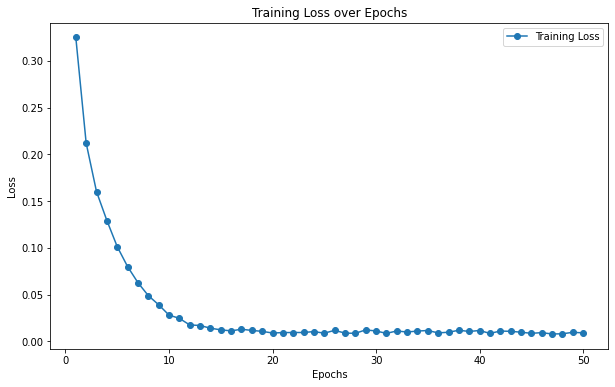

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

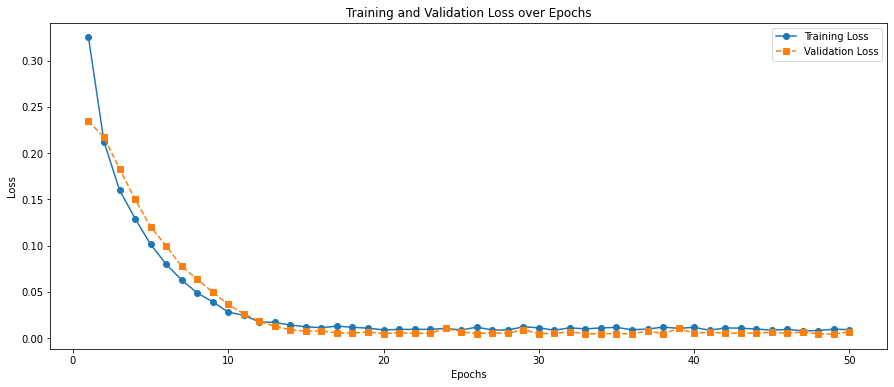

In [142]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 0s/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.061547598931492864
MAE : 0.048731351206298186


In [11]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        1.135493e+06    1234157.908
1        1.700193e+06    1575894.445
2        1.949550e+06    1714381.703
3        2.035330e+06    2067343.547
4        2.111101e+06    1856673.675
5        1.843447e+06    1914289.680
6        1.548530e+06    1802244.842
7        1.233878e+06    1202791.069
8        6.681264e+05     752834.272
9        3.354142e+05     451914.219
10       3.939990e+05     439855.813
11       6.689834e+05     807857.307
12       1.146648e+06    1184280.145
13       1.564375e+06    1468308.405
14       1.724896e+06    1540851.607
15       1.834122e+06    1989099.836
16       1.950399e+06    2096990.761
17       1.977398e+06    2080961.032
18       1.627188e+06    1695704.661
19       1.241862e+06    1533888.370
20       7.576728e+05    1038332.675
21       5.795028e+05     602954.621
22       4.939382e+05     895484.288
23       9.778095e+05    1070622.700
24       1.341027e+06    1532457.922
25       1.741529e+06    1703762.123
26       1.851731e+06    1855079.122
27       1.910870e+06    2291960.639
28       2.082736e+06    2114120.417
29       1.938061e+06    1995818.759
30       1.522010e+06    1653379.997
31       1.202033e+06    1070814.995
32       5.374537e+05     689443.815
33       5.524981e+05     401148.663
34       4.903593e+05     346558.057
35       8.087273e+05     599477.678
36       1.058904e+06     765764.905
37       1.323933e+06    1304133.179
38       1.783981e+06    1598436.099
39       1.974258e+06    1763844.414
40       1.951575e+06    1979139.524
41       1.945104e+06    1937348.663
42       1.698796e+06    1833093.342
43       1.178204e+06    1089676.114
44       6.199784e+05     453484.731
45       2.342210e+05     251559.554
46       2.154541e+05     351294.657
47       6.247951e+05     702389.714
48       1.048415e+06    1185169.054
49       1.593085e+06    1556568.455
50       1.835690e+06    1917507.979
51       2.087564e+06    2601630.327
52       2.374555e+06    2534223.780
53       2.303975e+06    2373004.525

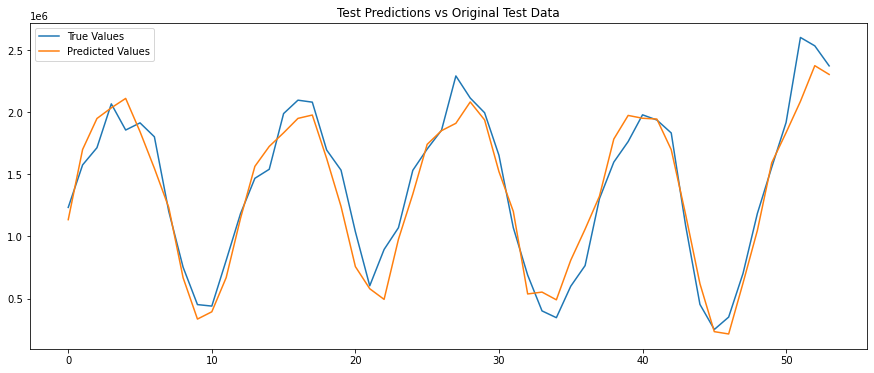

In [13]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [14]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

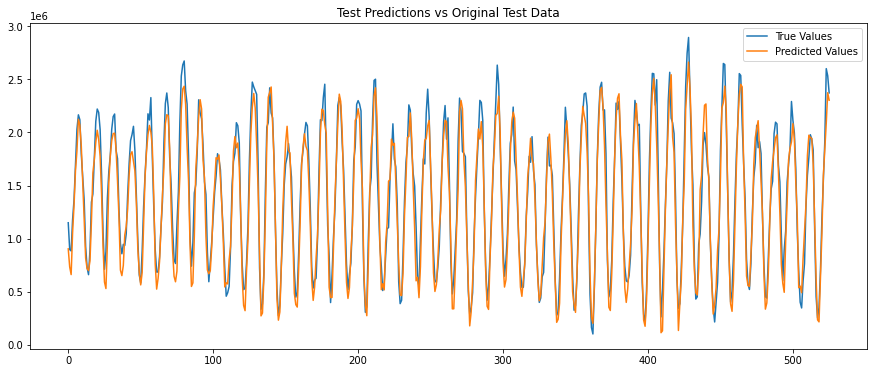

In [18]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()